## EXP_2389_sim_prune_0_4_256_run(1-10)
Dan Cox May 2021 CS299 Project

#### Imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
import warnings
from collections import OrderedDict

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten,Reshape
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import tempfile
import n_cut.n_cut as nc
import n_cut.MNIST_helper as mh

#### Make experiments dict

In [2]:
exp_dict = OrderedDict()

#### Get MNIST data

In [4]:
# Get mnist data split into train and test 60000 x 28 x 28 train, 10000 x 28 x28 test
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

#### Run experiment many times (num_runs)

run 0


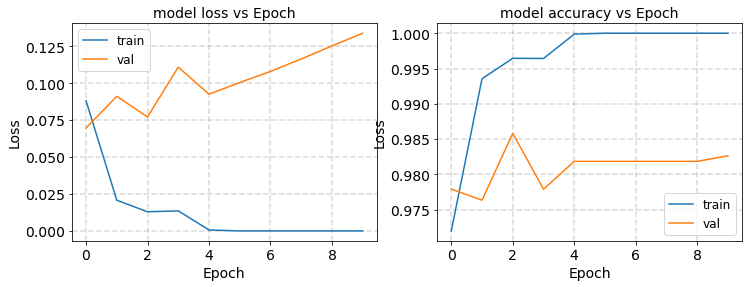

run 1


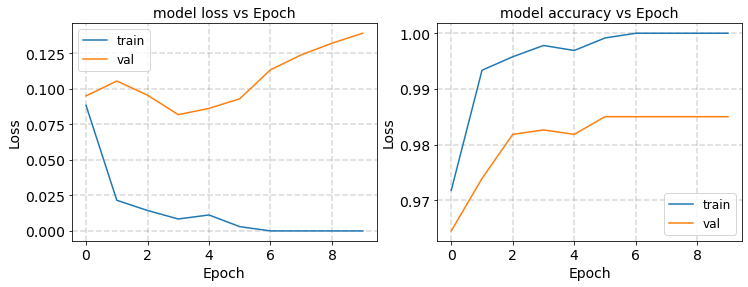

run 2


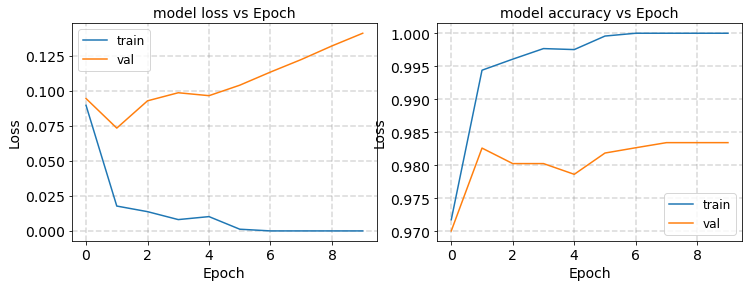

run 3


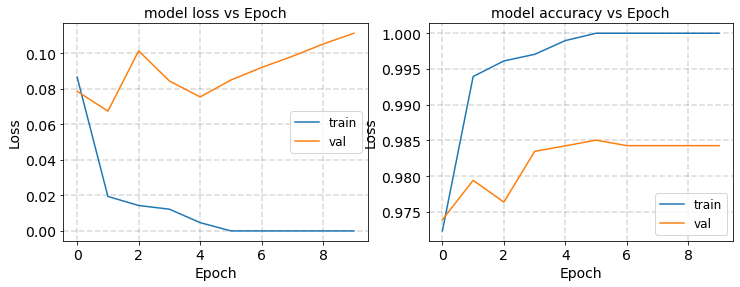

run 4


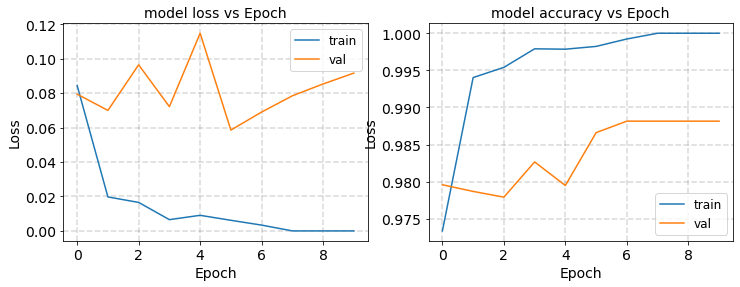

run 5


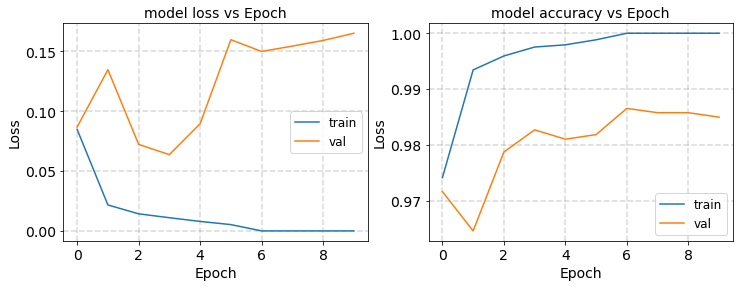

run 6


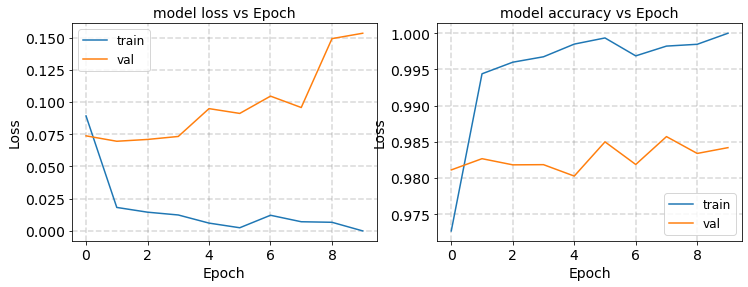

run 7


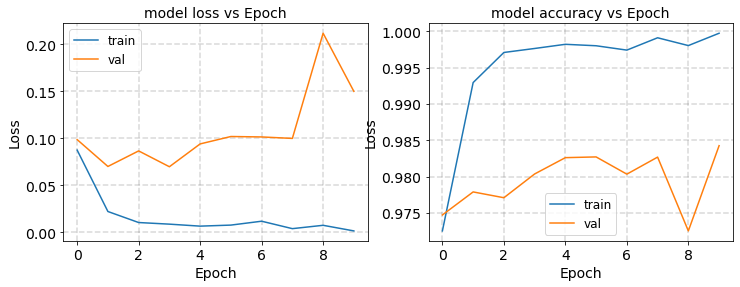

run 8


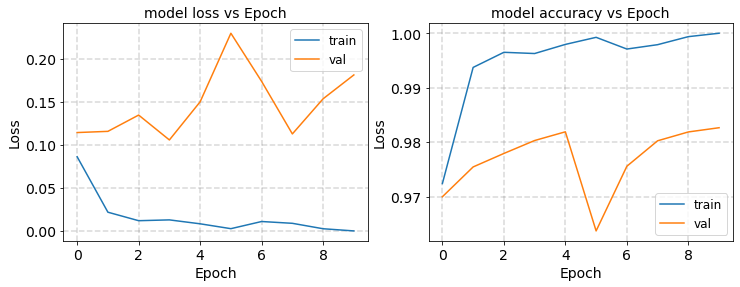

run 9


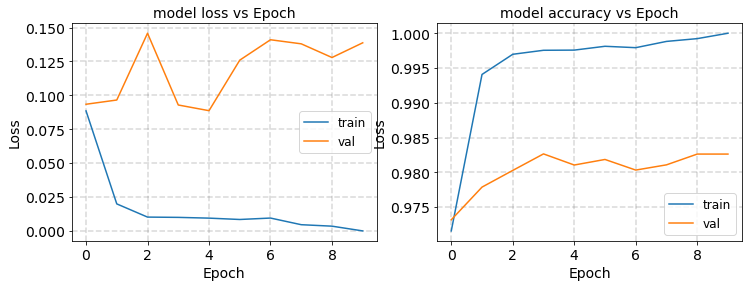

CPU times: user 25min 53s, sys: 1min 51s, total: 27min 45s
Wall time: 22min 33s


In [4]:
%%time
series = [2,3,8,9]
num_runs = 10
name = '2389_sim_prune_0_4_256_run'
for i in range(num_runs):
    print(f'run {i}')
    full_name = name + str(i)
    model, history = nc.make_train_simultaneous_model(x_train=x_train,
                                  y_train=y_train,
                                  x_test=x_test,
                                  y_test=y_test,
                                  series=series,
                                  num_hidden_layers=4,
                                  num_hidden_nodes=256,
                                  num_output_nodes=4,
                                  pruning=None,
                                  epochs=10,
                                  verbose=0,
                                  summary=False)
    
    exp_dict[full_name] = nc.get_n_cuts_and_p_value(
                        model = model,
                        model_history = history,
                        num_clusters=4,
                        random_state=None,
                        identity=False,
                        start=1,
                        num_shuffle_trials=20)


#### Convert Results to a dataframe

In [5]:
df = pd.DataFrame(exp_dict)
df = df.T
df_models = df.iloc[:, 0]
df.columns = ['model','N_cut','Mean_n_cut_rand', 'Std_n_cut_rand', 'Ste_n_cut_rand', 'Percentile','P_value', 'Significance','Direction', 'Accuracy']
df = df.drop('model', axis=1)
df

,N_cut,Mean_n_cut_rand,Std_n_cut_rand,Ste_n_cut_rand,Percentile,P_value,Significance,Direction,Accuracy
2389_sim_prune_0_4_256_run0,2.39938,2.29879,0.0131107,0.00293164,100,0,Yes,larger,0.98265
2389_sim_prune_0_4_256_run1,2.33948,2.24854,0.0102962,0.0023023,100,0,Yes,larger,0.985
2389_sim_prune_0_4_256_run2,2.39616,2.26383,0.0100789,0.00225372,100,0,Yes,larger,0.983425
2389_sim_prune_0_4_256_run3,2.37262,2.28355,0.0139378,0.00311659,100,0,Yes,larger,0.984275
2389_sim_prune_0_4_256_run4,2.31472,2.27011,0.0174459,0.00390103,100,0,Yes,larger,0.98815
2389_sim_prune_0_4_256_run5,2.29837,2.27074,0.0168192,0.00376089,95,0.1,No,larger,0.98495
2389_sim_prune_0_4_256_run6,2.33941,2.22773,0.0082867,0.00185296,100,0,Yes,larger,0.9842
2389_sim_prune_0_4_256_run7,2.32792,2.22816,0.00459486,0.00102744,100,0,Yes,larger,0.98425
2389_sim_prune_0_4_256_run8,2.36884,2.22556,0.00566747,0.00126729,100,0,Yes,larger,0.98265
2389_sim_prune_0_4_256_run9,2.27682,2.23244,0.00666017,0.00148926,100,0,Yes,larger,0.982625


#### Save dataframe

In [6]:
import pickle
with open('df_'+ name, 'wb') as fp:
    pickle.dump(df, fp)
    
with open('df_'+ name, 'rb') as fp:
    df = pickle.load(fp)
df

,N_cut,Mean_n_cut_rand,Std_n_cut_rand,Ste_n_cut_rand,Percentile,P_value,Significance,Direction,Accuracy
2389_sim_prune_0_4_256_run0,2.39938,2.29879,0.0131107,0.00293164,100,0,Yes,larger,0.98265
2389_sim_prune_0_4_256_run1,2.33948,2.24854,0.0102962,0.0023023,100,0,Yes,larger,0.985
2389_sim_prune_0_4_256_run2,2.39616,2.26383,0.0100789,0.00225372,100,0,Yes,larger,0.983425
2389_sim_prune_0_4_256_run3,2.37262,2.28355,0.0139378,0.00311659,100,0,Yes,larger,0.984275
2389_sim_prune_0_4_256_run4,2.31472,2.27011,0.0174459,0.00390103,100,0,Yes,larger,0.98815
2389_sim_prune_0_4_256_run5,2.29837,2.27074,0.0168192,0.00376089,95,0.1,No,larger,0.98495
2389_sim_prune_0_4_256_run6,2.33941,2.22773,0.0082867,0.00185296,100,0,Yes,larger,0.9842
2389_sim_prune_0_4_256_run7,2.32792,2.22816,0.00459486,0.00102744,100,0,Yes,larger,0.98425
2389_sim_prune_0_4_256_run8,2.36884,2.22556,0.00566747,0.00126729,100,0,Yes,larger,0.98265
2389_sim_prune_0_4_256_run9,2.27682,2.23244,0.00666017,0.00148926,100,0,Yes,larger,0.982625


In [7]:
df_models[0].layers[1].get_weights()[0]

array([[-0.03809614,  0.06132139,  0.03628959, ...,  0.01737458,
        -0.00121268,  0.07454404],
       [-0.0371844 , -0.00069354,  0.05852281, ..., -0.05203031,
         0.03096695,  0.075113  ],
       [-0.04960508,  0.02277417, -0.03998944, ...,  0.0610247 ,
        -0.06608894,  0.03055631],
       ...,
       [ 0.0103217 ,  0.02904625, -0.00602361, ...,  0.06527781,
         0.03316525, -0.00113999],
       [ 0.04193889,  0.01500071, -0.0594208 , ..., -0.06584268,
         0.03386279,  0.00206229],
       [ 0.00697222, -0.06509756,  0.02698112, ..., -0.01992194,
        -0.06220815,  0.01118533]], dtype=float32)

#### Look at results of first experiment

In [8]:
for val in exp_dict[name + str(0)]:
    print(val)

2.3993776467321224
2.298792230844014
0.013110710848413918
0.002931644069039746
100.0
0.0
Yes
larger
0.9826499819755554
